### Exploratory notebook: testing different PSD calculation settings

In [170]:
import os
import mne
import json
import random
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper

from settings import paths

In [2]:
epoch_folder = paths['epochs_folder']
plot_folder = paths['plots_folder']

Lets load one epoch file for testing purposes

In [28]:
subject_id = 39508
epochs = mne.read_epochs(os.path.join(epoch_folder, f"filtered_epochs_resting_state_{subject_id}-epo.fif"), preload=True)

Let's plot a few random epochs

In [29]:
len(epochs)

2013

Pick a certain channel

In [30]:
channel = "OFC_L"

Let's pick a random epoch from that channel

In [101]:
random_epoch_index = random.sample(range(0, len(epochs)), 1)
random_epoch = epochs[random_epoch_index[0]]

In [128]:
# get the average PSD for this subject
psds_sub, freqs = psd_array_multitaper(
    random_epoch.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1
)
mean_psd_sub_default = np.mean(psds_sub[:, 0, :], axis=0)

Now let's change the bandwidth a bit. The default bandwidth is: 8 * (sfreq / n_times). Where n_times is the last digit of the shape of the input of the psd_array_multitaper function. In our case 5423.

In [103]:
n_times = random_epoch.get_data(picks=channel).shape[2]

In [159]:
bandwidth1 = 5
bandwidth2 = 7

In [160]:
# get the average PSD for this subject
psds_sub, freqs = psd_array_multitaper(
    random_epoch.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    bandwidth=bandwidth1
)
mean_psd_sub_bandwidth1 = np.mean(psds_sub[:, 0, :], axis=0)

In [161]:
# get the average PSD for this subject
psds_sub, freqs = psd_array_multitaper(
    random_epoch.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    bandwidth=bandwidth2
)
mean_psd_sub_bandwidth2 = np.mean(psds_sub[:, 0, :], axis=0)

In [162]:
# get the average PSD for this subject
psds_sub, freqs = psd_array_multitaper(
    random_epoch.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    normalization="full"
)
mean_psd_sub_combi = np.mean(psds_sub[:, 0, :], axis=0)

Let's plot the different settings in one figure

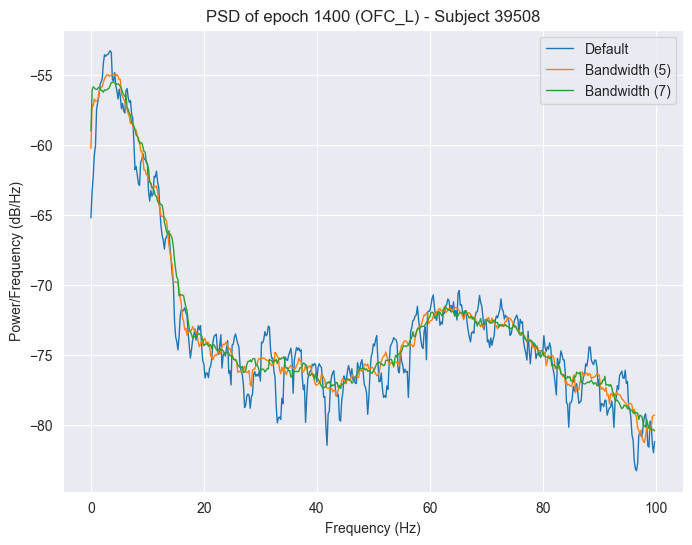

In [163]:
fig, ax = plt.subplots(figsize=(8, 6))  # initiate plot

ax.plot(freqs, 10 * np.log10(mean_psd_sub_default), label="Default", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_bandwidth1), label=f"Bandwidth ({round(bandwidth1)})", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_bandwidth2), label=f"Bandwidth ({round(bandwidth2)})", linewidth=1)

# add axis labels and title
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title(f'PSD of epoch {random_epoch_index[0]} ({channel}) - Subject {subject_id}')
plt.legend()

In [164]:
# get the average PSD for this subject
psds_sub, freqs = psd_array_multitaper(
    random_epoch.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    normalization='full'
)
mean_psd_sub_adaptive = np.mean(psds_sub[:, 0, :], axis=0)

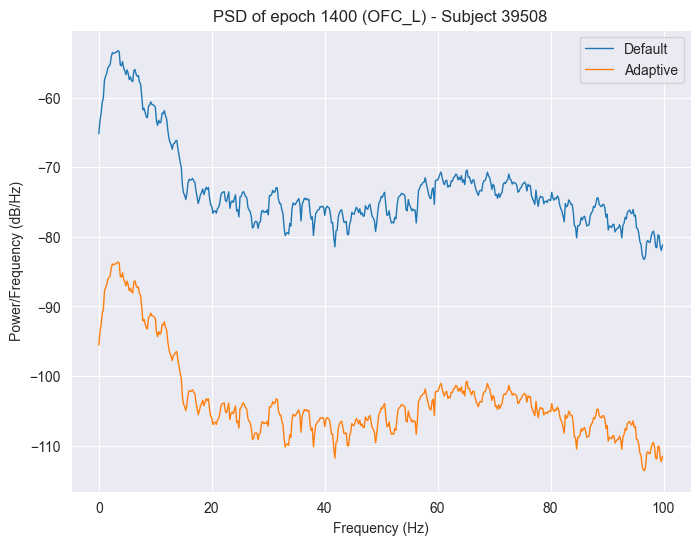

In [165]:
fig, ax = plt.subplots(figsize=(8, 6))  # initiate plot

ax.plot(freqs, 10 * np.log10(mean_psd_sub_default), label="Default", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_adaptive), label="Adaptive", linewidth=1)

# add axis labels and title
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title(f'PSD of epoch {random_epoch_index[0]} ({channel}) - Subject {subject_id}')
plt.legend()

#### Let's test the effect of the bandwidth changes on the subject averages

First we need a few more subject

In [185]:
epochs_79604 = mne.read_epochs(os.path.join(epoch_folder, "filtered_epochs_resting_state_79604-epo.fif"), preload=True)
epochs_81193 = mne.read_epochs(os.path.join(epoch_folder, "filtered_epochs_resting_state_81193-epo.fif"), preload=True)

In [168]:
psds_sub, freqs = psd_array_multitaper(
    epochs_79604.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1
)
mean_psd_sub_bw1 = np.mean(psds_sub[:, 0, :], axis=0)

# now with bandwidth 5
psds_sub, freqs = psd_array_multitaper(
    epochs_79604.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    bandwidth=5
)
mean_psd_sub_bw2 = np.mean(psds_sub[:, 0, :], axis=0)

# now with bandwidth 8
psds_sub, freqs = psd_array_multitaper(
    epochs_79604.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    bandwidth=8
)
mean_psd_sub_bw3 = np.mean(psds_sub[:, 0, :], axis=0)

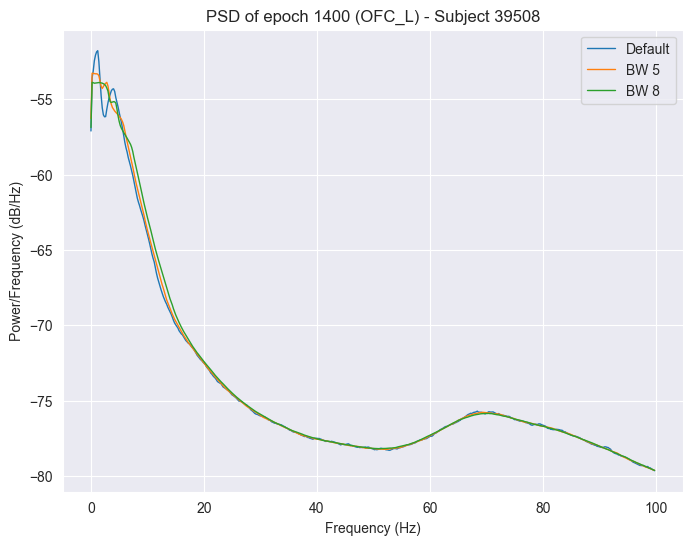

In [184]:
fig, ax = plt.subplots(figsize=(8, 6))  # initiate plot

ax.plot(freqs, 10 * np.log10(mean_psd_sub_bw1), label="Default", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_bw2), label="BW 5", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_bw3), label="BW 8", linewidth=1)

# add axis labels and title
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title(f'PSD of epoch {random_epoch_index[0]} ({channel}) - Subject {subject_id}')
plt.legend()

In [186]:
channel = "OFC_R"

In [187]:
print(len(epochs_79604), len(epochs_81193))

1445 2005


In [188]:
random_epoch_index = random.sample(range(0, len(epochs_79604)), 1)
random_epoch_79604 = epochs_79604[random_epoch_index[0]]
random_epoch_81193 = epochs_81193[random_epoch_index[0]]

In [189]:
psds_sub, freqs = psd_array_multitaper(
    random_epoch_79604.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1
)
mean_psd_sub_79604def = np.mean(psds_sub[:, 0, :], axis=0)

psds_sub, freqs = psd_array_multitaper(
    random_epoch_79604.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1
)
mean_psd_sub_79604full = np.mean(psds_sub[:, 0, :], axis=0)

psds_sub, freqs = psd_array_multitaper(
    random_epoch_81193.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1
)
mean_psd_sub_81193def = np.mean(psds_sub[:, 0, :], axis=0)

psds_sub, freqs = psd_array_multitaper(
    random_epoch_81193.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1
)
mean_psd_sub_81193full = np.mean(psds_sub[:, 0, :], axis=0)

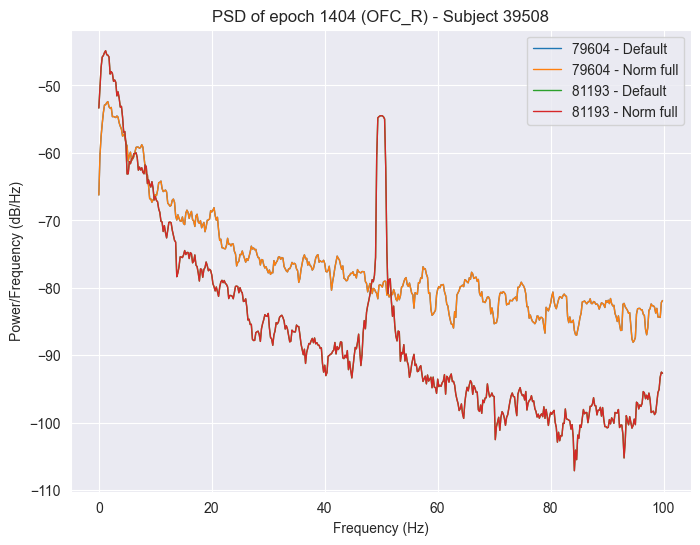

In [190]:
fig, ax = plt.subplots(figsize=(8, 6))  # initiate plot

ax.plot(freqs, 10 * np.log10(mean_psd_sub_79604def), label="79604 - Default", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_79604full), label="79604 - Norm full", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_81193def), label="81193 - Default", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_81193full), label="81193 - Norm full", linewidth=1)

# add axis labels and title
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title(f'PSD of epoch {random_epoch_index[0]} ({channel}) - Subject {subject_id}')
plt.legend()

In [191]:
psds_sub, freqs = psd_array_multitaper(
    random_epoch_81193.get_data(picks=channel),
    fmin=0, fmax=100,
    sfreq=random_epoch.info['sfreq'],
    n_jobs=-1,
    bandwidth=8
)
mean_psd_sub_81193 = np.mean(psds_sub[:, 0, :], axis=0)

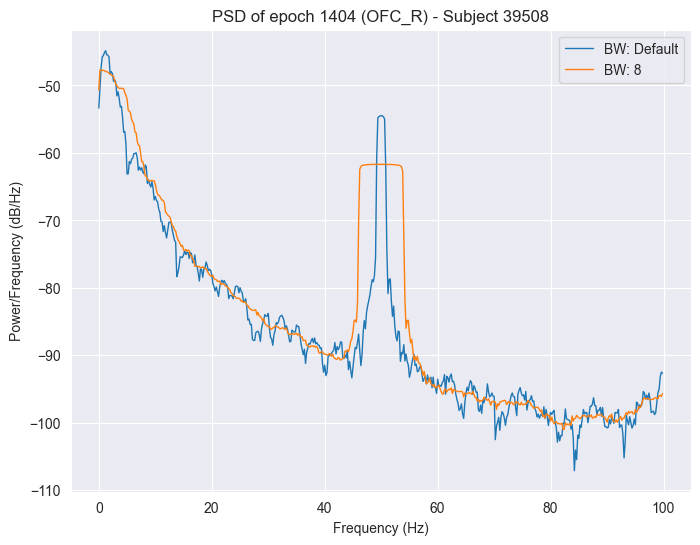

In [192]:
fig, ax = plt.subplots(figsize=(8, 6))  # initiate plot

ax.plot(freqs, 10 * np.log10(mean_psd_sub_81193def), label="BW: Default", linewidth=1)
ax.plot(freqs, 10 * np.log10(mean_psd_sub_81193), label="BW: 8", linewidth=1)

# add axis labels and title
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title(f'PSD of epoch {random_epoch_index[0]} ({channel}) - Subject {subject_id}')
plt.legend()